<a href="https://colab.research.google.com/github/AdarshKammar/Python/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimized Model Accuracy: 0.73
Confusion Matrix:
[[39 11]
 [13 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.70      0.67      0.68        39

    accuracy                           0.73        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.73      0.73        89



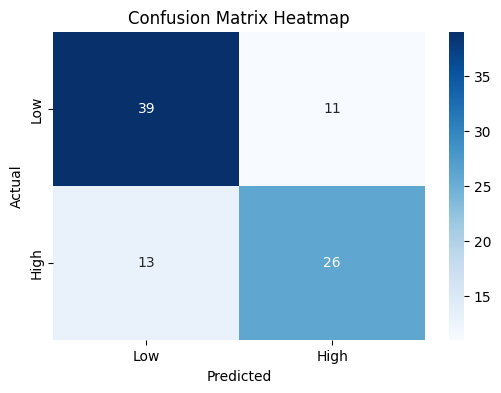


Best Parameters Found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > diabetes.target.mean()).astype(int)  # Convert to binary classification

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_clf = grid_search.best_estimator_

# Train the model
best_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Print best parameters
print("\nBest Parameters Found:", grid_search.best_params_)
